In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbs = ['ddf_0.23deg_1exp_pairsmix_10yrs.db',  'ddf_pn_0.23deg_1exp_pairsmix_10yrs.db',
       'ddf_0.70deg_1exp_pairsmix_10yrs.db',  'ddf_pn_0.70deg_1exp_pairsmix_10yrs.db',
       '../baselines/baseline_1exp_pairsmix_10yrs.db']


In [3]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
# EXDFS
RA = 53.125
dec = -28.-6/60.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 494536 visits
Running:  ['opsim_Count_observationStartMJD_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 494882 visits
Running:  ['opsim_Count_observationStartMJD_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 493770 visits
Running:  ['opsim_Count_observationStartMJD_r_HEAL']
Completed

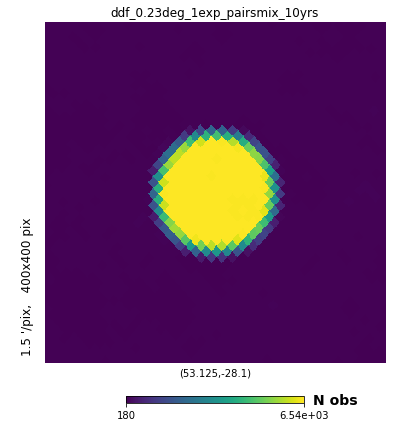

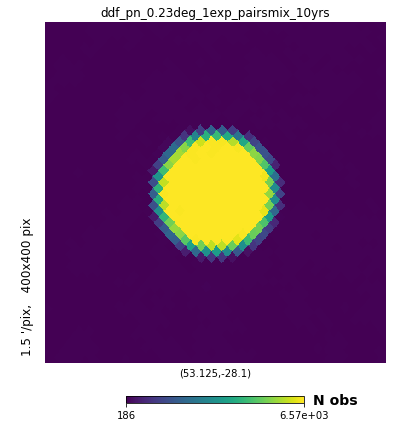

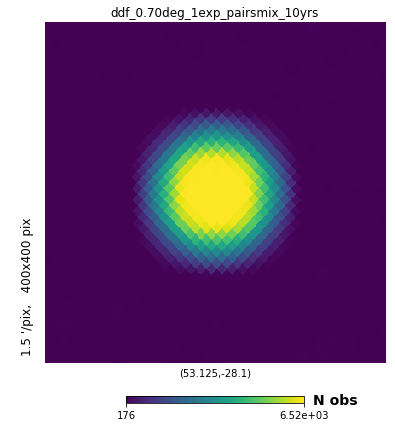

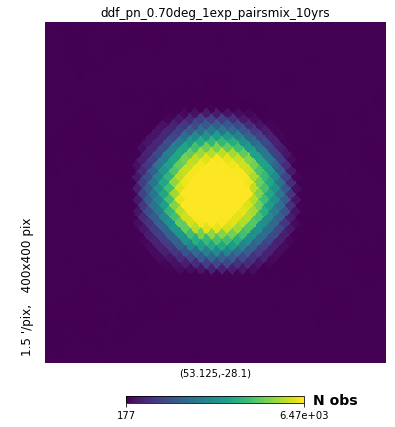

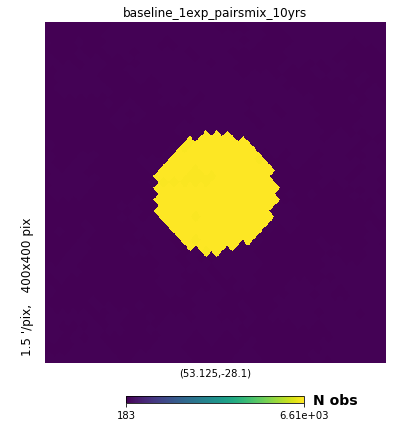

In [4]:

for database in dbs:
    conn = db.OpsimDatabase(database)
    bundleList = []

    metric = metrics.CountMetric(col='observationStartMJD')
    slicer = slicers.HealpixSlicer(nside=256)
    sql = 'filter="r"'
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    title = database.split('/')[-1].replace('.db', '')
    hp.gnomview(bundleList[0].metricValues, rot=(RA, dec), xsize=400, title=title, unit='N obs')
    plt.savefig('temp/'+title+'.pdf')